In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Flatten

In [2]:
((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [3]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  

test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [5]:
model = k.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128,  activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1, 
validation_split=0.2)

Epoch 1/50


C:\Users\steph\AppData\Roaming\Python\Python310\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 5s 2ms/step - loss: 0.2842 - accuracy: 0.9194 - val_loss: 0.1502 - val_accuracy: 0.9589
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1253 - accuracy: 0.9627 - val_loss: 0.1203 - val_accuracy: 0.9632
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9747 - val_loss: 0.0970 - val_accuracy: 0.9695
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0642 - accuracy: 0.9809 - val_loss: 0.0959 - val_accuracy: 0.9703
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0921 - val_accuracy: 0.9732
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0827 - val_accuracy: 0.9752
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0310 - accuracy: 0.9911 - val_loss: 0.0813 - val_accuracy: 0.9754
Epo

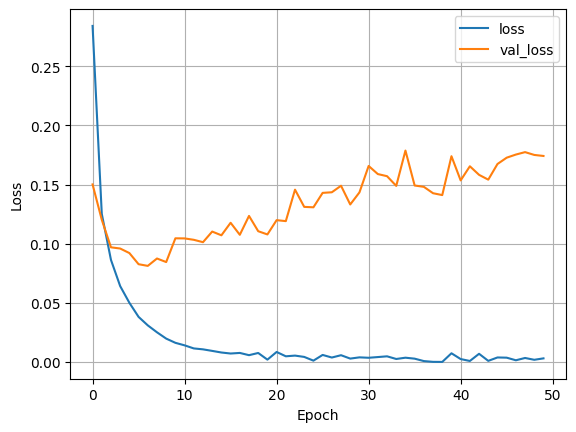

In [7]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [8]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color ='blue'
    else:
      color ='red'
    plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)

In [12]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array,
    color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 1s 1ms/step


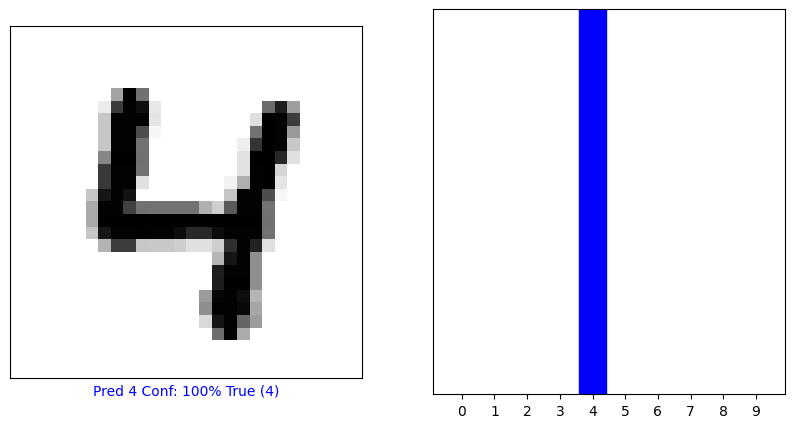

In [13]:
predictions = model.predict(test_data)
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()